## Understanding QQ plots
https://data.library.virginia.edu/understanding-q-q-plots/

How to create a QQ plot in Desmos
https://www.desmos.com/calculator/d8xho6oobw

In [40]:
import numpy as np
import math


1. Generate a sequence of 20 values that follows a normal distribution with $\mu=3$ and $\sigma=0.2$. These will represent our data.

*Hint: Use the function random.normal from numpy*

In [41]:
mu, sigma = 3, 0.2
data_normal = np.random.normal(mu, sigma, 20)

3. Standardize the data and sort them in ascending order



In [42]:
data_standard = (data_normal - mu) / sigma
data_standard_sorted = data_standard
data_standard.sort()

data_standard

array([-2.32451527, -1.73867595, -1.51137102, -0.84348319, -0.74530871,
       -0.73241738, -0.55417544, -0.31178953, -0.10648428,  0.05231117,
        0.21073249,  0.23011198,  0.27603516,  0.47631208,  0.54439135,
        0.73015003,  1.18906354,  1.26219955,  1.38920291,  1.7743988 ])

3. Create a numpy array of length 20 with numbers from 1 to 20


In [43]:
i = np.arange(1, 21)

In [44]:
i

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

4. Generate a sequence of percentages equally spaced used to calculate the quantiles

In [45]:

P = (i - 0.5) / 20

In [46]:
P

array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
       0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875,
       0.925, 0.975])

5. Calculate the theoretical quantiles for the standard normal distribution (with scipy). The command ppf takes a percentage and returns a standard deviation multiplier for what value that percentage occurs at (quantile).

The ppf is the inverse of cdf, which returns the cumulative distribution function (the probability)

In [47]:
from scipy.stats import norm

theo_q = norm.ppf(P)

theo_q

array([-1.95996398, -1.43953147, -1.15034938, -0.93458929, -0.75541503,
       -0.59776013, -0.45376219, -0.31863936, -0.18911843, -0.06270678,
        0.06270678,  0.18911843,  0.31863936,  0.45376219,  0.59776013,
        0.75541503,  0.93458929,  1.15034938,  1.43953147,  1.95996398])

6. Draw a scatter plot of empirical quantiles versus theoretical quantiles, and the line y=x.

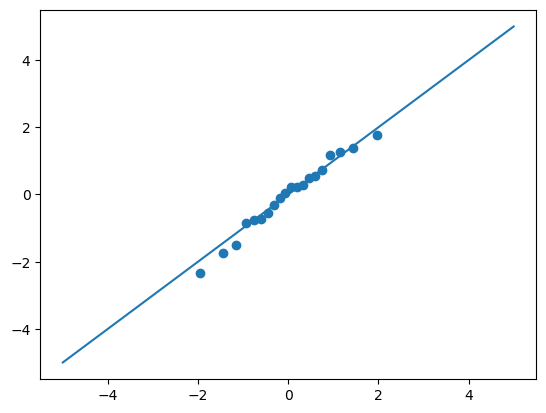

In [48]:
import matplotlib.pyplot as plt
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_standard_sorted)
plt.show()

## Not normal data

Let's generate data with a skewed distribution (skewed right, with a long tail on the right)

In [49]:
from scipy.stats import skewnorm
import math

skew = 6.0
mean = 0
stdev = 1

delta = skew / math.sqrt(1. + math.pow(skew, 2.))
adjStdev = math.sqrt(math.pow(stdev, 2.) / (1. - 2. * math.pow(delta, 2.) / math.pi))
adjMean = mean - adjStdev * math.sqrt(2. / math.pi) * delta
data_skewed = skewnorm.rvs(a = skew, loc=adjMean, scale=adjStdev, size=20)


data_skewed = np.sort(data_skewed)

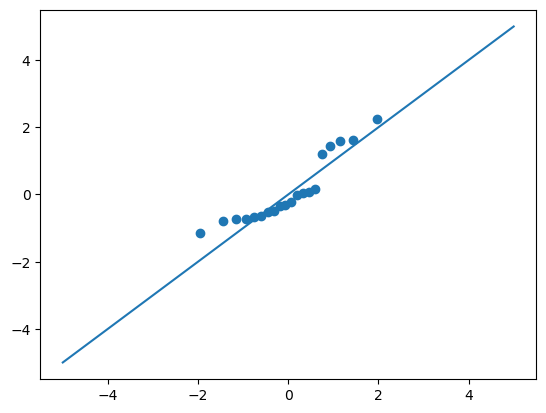

In [50]:
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_skewed)
plt.show()

## Data with a t distribution with small dof

In [51]:
data_t = np.random.standard_t(3, 20)
data_t = np.sort(data_t)

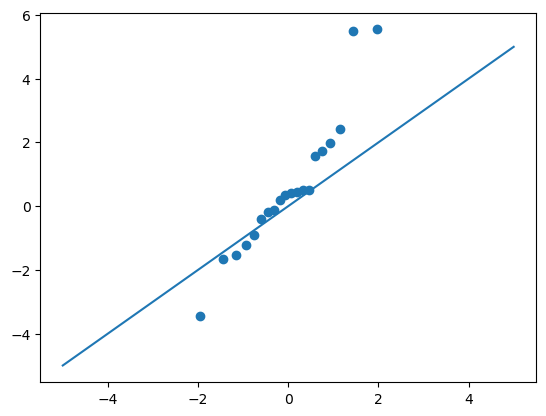

In [52]:
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_t)
plt.show()

## Using statsmodels library

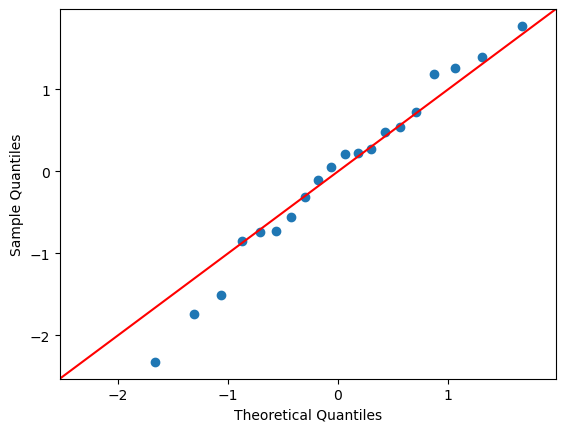

In [53]:
import statsmodels.api as sm
sm.qqplot(data_standard, line='45')
plt.show()
